### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

A set of good data-cleaning tasks advocated by the course instructors is as follows:
 - Eliminate duplicates
 - Resolve structural errors
 - Filter outliers
 - Handle missing data
 - Validate

I will execute these steps in this section, in no particular order.

Looking at the info will give a good starting point for understanding the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### Missing values

A quick scan shows that there are null values in this dataset. We will definitely want to understand these in the business context and address them.

In [5]:
nulls = pd.DataFrame(data.isnull().sum()).reset_index()
column_names = ['column name', 'missing count']
nulls.columns = column_names
nulls = nulls[nulls['missing count'] != 0]
nulls['% of total rows'] = nulls['missing count'] / data.shape[0]
nulls

,column name,missing count,% of total rows
14,car,12576,0.991485
15,Bar,107,0.008436
16,CoffeeHouse,217,0.017108
17,CarryAway,151,0.011905
18,RestaurantLessThan20,130,0.010249
19,Restaurant20To50,189,0.014901


In [6]:
column_names = list(nulls['column name'])
column_names

for column in column_names:
    print(f"{column}:\n    {data[column].unique()})")

car:
    [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D'])
Bar:
    ['never' 'less1' '1~3' 'gt8' nan '4~8'])
CoffeeHouse:
    ['never' 'less1' '4~8' '1~3' 'gt8' nan])
CarryAway:
    [nan '4~8' '1~3' 'gt8' 'less1' 'never'])
RestaurantLessThan20:
    ['4~8' '1~3' 'less1' 'gt8' nan 'never'])
Restaurant20To50:
    ['1~3' 'less1' 'never' 'gt8' '4~8' nan])


"Car" holds junk values. It's possibly free form, there are only 5 values across the entire dataset, and it is 99% missing.
We will drop this column.

The remaining columns seem useful and only have a small amount of missing values (~1%), so we can simply drop the rows that have the missing values, and we will still have abundant data for analysis.

#### Structural

The info and head also show that some attributes that we might expect as integers are in fact object data types. This usually happens when numeric data is binned, and we can in fact see that in the income column, for example.

In [7]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

Numeric values will likely be more useful for us than the bins, so let's impute these values to the __highest__ number in the bin.

In [8]:
# create a mapping so we can impute income
income_mapping = {
    'Less than $12500': 12500,
    '$12500 - $24999': 24999,
    '$25000 - $37499': 37499,
    '$37500 - $49999': 49999,
    '$50000 - $62499': 62499,
    '$62500 - $74999': 74999,
    '$75000 - $87499': 87499,
    '$87500 - $99999': 99999,
    '$100000 or More': 11299
}

data['income'] = data['income'].replace(income_mapping)
data['income'] = pd.to_numeric(data['income'], errors='coerce')
data['income']

0        49999
1        49999
2        49999
3        49999
4        49999
         ...  
12679    87499
12680    87499
12681    87499
12682    87499
12683    87499
Name: income, Length: 12684, dtype: int64

We might impute additional binned values, but it would be easier to manage this once we drop missing values.

#### Duplicates

In [9]:
duplicates = data[data.duplicated()]
duplicates.shape[0]

74

There are some rows in the dataframe that have the same values for all attributes. Looking at them can allow us to decided if they are truly duplicates.

In [10]:
duplicates.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0


I see no attributes in the data that are uniquely identifying. In other words, we have a collection of attributes about some event (a coupon being sent), but there's no attribute that can identify that we are counting the same event twice. 

For example, if we had the SSN of the drive receiving the coupon, and all other attributes were the same, we might assume that there was either an error in the process (two of the same coupon sent inappropriately), or an error in the data. 

We don't have enough justification that these datapoints are really duplicates in order to drop them; we will not drop them.

#### Outliers
The worry with outliers is not relevant here. The reason is that we have mostly categorical data. We do have a few numeric values, but these are binary indicators. We have imputed income, but we know from the mapping that none of these values would constitute an outlier.

3. Decide what to do about your missing data -- drop, replace, other...

#### Missing values
As determined earlier, we will drop the cars column and we will drop rows that contain missing values in all other rows.

In [11]:
data.drop('car', axis=1, inplace=True)

In [12]:
data.shape[0]

12684

In [13]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [14]:
data.dropna(inplace=True)


In [15]:
data.shape[0]

12079

In [16]:
# validate that we have removed missing values
nulls = pd.DataFrame(data.isnull().sum()).reset_index()
column_names = ['column name', 'missing count']
nulls.columns = column_names
nulls = nulls[nulls['missing count'] != 0]
nulls['% of total rows'] = nulls['missing count'] / data.shape[0]
print(f'Have we removed missing values? {not bool(nulls.shape[0])}')

Have we removed missing values? True


4. What proportion of the total observations chose to accept the coupon? 



In [17]:
acceptance_rates = pd.DataFrame(data['Y'].value_counts(normalize=True))
acceptance_rates

,Y
1,0.569335
0,0.430665


Just under 57% of drivers accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

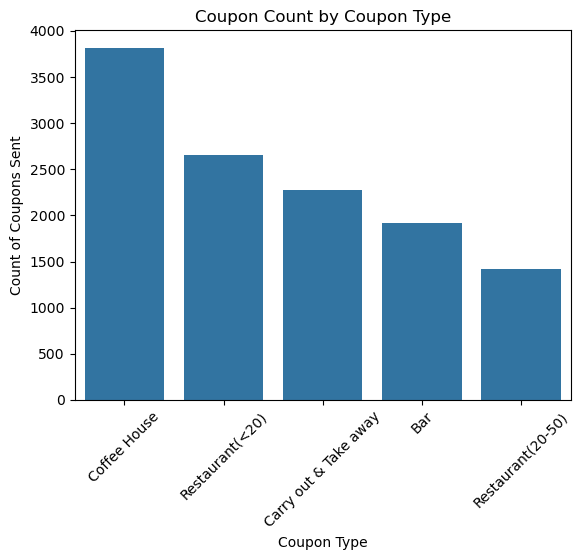

In [18]:
# prepare the coupon column
coupons = data['coupon']
coupon_counts = coupons.value_counts().reset_index()
coupon_counts.rename(columns={'index': 'coupon type', 'coupon': 'count'}, inplace=True)
coupon_counts

# plot the data
sns.barplot(data=coupon_counts, x='coupon type', y='count')
plt.title('Coupon Count by Coupon Type')
plt.ylabel('Count of Coupons Sent')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.show()

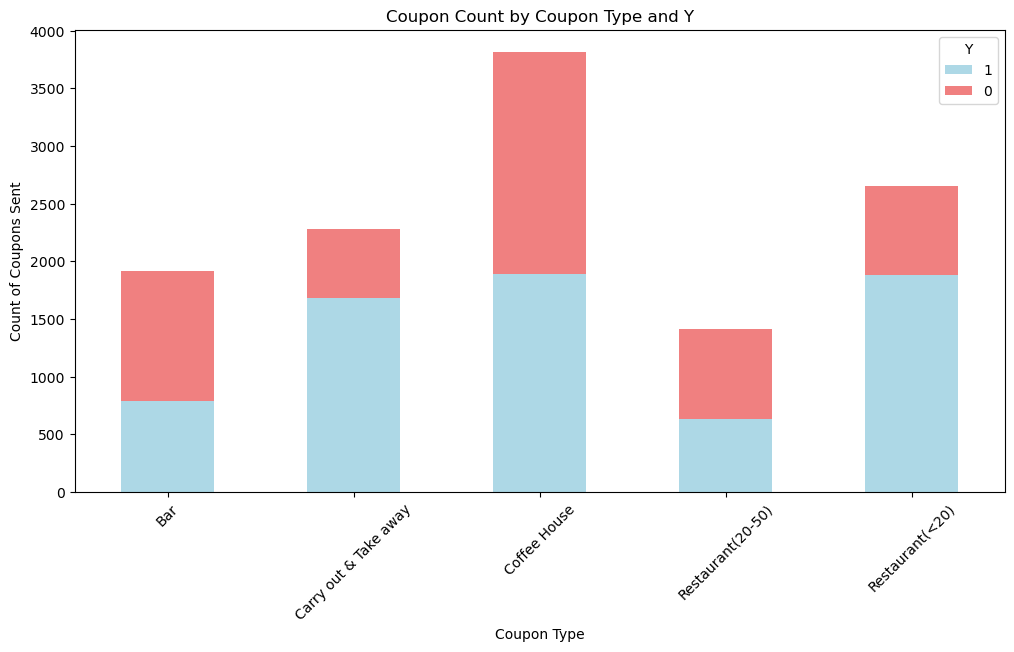

In [19]:
# do this again, but stack a barchat so we can get a sense of Y distribution
coupons = data['coupon']
coupon_counts = pd.crosstab(coupons, data['Y'])

# reverse order of Y so the barplot looks better
coupon_counts = coupon_counts[[1, 0]]

colors = ['lightblue', 'lightcoral']
coupon_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Coupon Count by Coupon Type and Y')
plt.ylabel('Count of Coupons Sent')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.show()


One nice thing about the above analysis is you can roughly tell that the acceptance rates of Carry out and Cheap Restaurants are high, and that the acceptance rate for Bar and Expensive Restaurants is low; Coffee House looks close to 50% acceptance rate.

I will visit this later during independent analysis.

6. Use a histogram to visualize the temperature column.

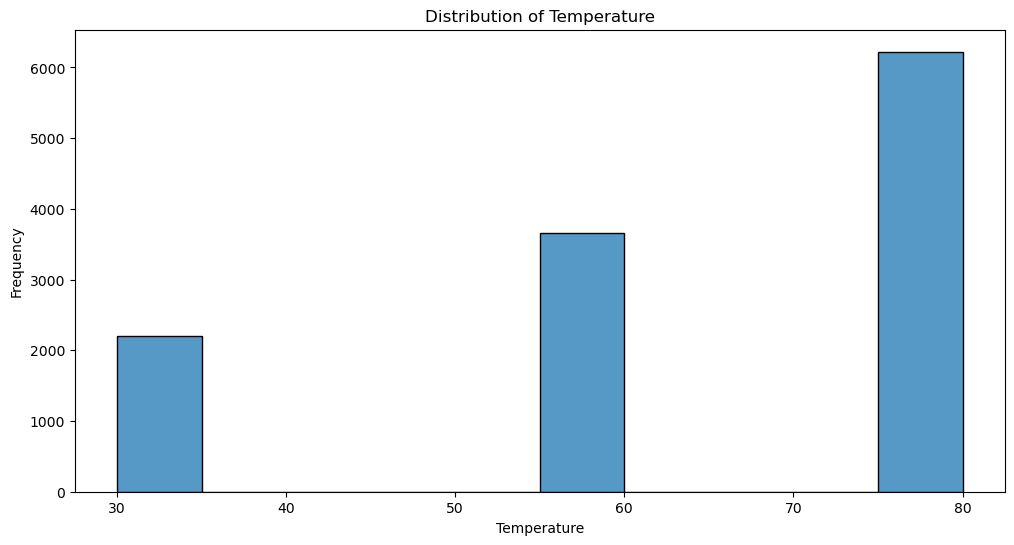

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data['temperature'], bins=10)

plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

This histogram shows that there are just three populated bins, and from reviewing the data there are actually just three values

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
bar = data.query("coupon == 'Bar'")
bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [22]:
bar.shape[0]

1913

2. What proportion of bar coupons were accepted?


In [23]:
bar_yes_rate = round(bar['Y'].mean(), 4)
print(f'Bar coupon acceptance rate = {bar_yes_rate}')
print(f'{bar_yes_rate*100}% of bar coupons are accepted')

Bar coupon acceptance rate = 0.4119
41.19% of bar coupons are accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
bar_lt_4_rate = round(bar.query("Bar in ['never', '1~3']")['Y'].mean() ,4)
bar_ge_4_rate = round(bar.query("Bar not in ['never', '1~3']")['Y'].mean(), 4)

print(f'Acceptance rate for drivers who go to bar 3 or fewer times a month: {bar_lt_4_rate*100}%')
print(f'Acceptance rate for drivers who go to bar 4 or more times a month: {bar_ge_4_rate*100}%')

Acceptance rate for drivers who go to bar 3 or fewer times a month: 33.76%
Acceptance rate for drivers who go to bar 4 or more times a month: 52.82%


Frequent bargoers were more likely to accept the coupon than relatively less frequent bargoers.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
bargoers_26_up = round(bar.query("Bar not in ['never'] and age > '25'")['Y'].mean() ,4)
others = round(bar.query("Bar == 'never' or age <= '25'")['Y'].mean(), 4)

print(f'Acceptance rate for drivers who go to bar more than once a month and over 25: {round(bargoers_26_up*100,2)}%')
print(f'Acceptance rate for all other drivers: {others*100}%')

Acceptance rate for drivers who go to bar more than once a month and over 25: 54.29%
Acceptance rate for all other drivers: 30.45%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [26]:
bargoer_no_kid_pass = round(bar.query("Bar != 'never' and passanger not in ['Alone','Kid(s)'] \
                                        and occupation != 'Farming Fishing & Forestry'")['Y'].mean() ,4)
others2 = round(bar.query("Bar == 'never' or passanger in ['Alone','Kid(s)'] \
                                    or occupation == 'Farming Fishing & Forestry'")['Y'].mean(), 4)

print(f'Acceptance rate for drivers who go to bar more than once a month \
        \n    and had non-kid passanger and do not work in these industries: {round(bargoer_no_kid_pass*100,2)}%')
print(f'Acceptance rate for all other drivers: {others2*100}%')

Acceptance rate for drivers who go to bar more than once a month         
    and had non-kid passanger and do not work in these industries: 63.11%
Acceptance rate for all other drivers: 36.01%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
cat1 = bar.query("Bar != 'never' and passanger not in ['Alone','Kid(s)'] and maritalStatus != 'Widowed'")['Y'].mean()
cat2 = bar.query("Bar != 'never' and age < '30'")['Y'].mean()
cat3 = bar.query("income < 50000 and RestaurantLessThan20 in ['4~8', 'gt8']")['Y'].mean()

print(f'Bar once a month, had nonkid passenger(s), not widowed = {round(cat1*100,2)}%')
print(f'Bar once a month, younger than 30 = {round(cat2*100,2)}%')
print(f'Bar more than 4 times a month, income < $50,000 = {round(cat3*100,2)}%')

Bar once a month, had nonkid passenger(s), not widowed = 63.64%
Bar once a month, younger than 30 = 65.6%
Bar more than 4 times a month, income < $50,000 = 45.55%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I hypothesize that drivers who accepted the bar coupons, first and foremost, are frequent bargoers.
Additionally, their careers, lesser social responsibility (younger, no kids in car), and relatively higher income all support their bargoing.

Basically, if the driver had the desire (bargoing behavior), time (not with kids, younger, not in timeconsuming occupations), and/or income, then they were more likely to accept.

This is inferential, and not a conclusive analysis, but our common sense findings lead to a good follow-up for future investigation.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Approach

In order to complete this investigation, I need to select a coupon type (non-bar) to analyze.

Reviewing my findings in the previous phase of this assignment, I observed that Coffee House coupons represented the highest number of coupons sent, but had one of, if the not the lowest, acceptance rates.

I shall confirm this with the below analysis that plots the actual rates of acceptance (number accepted / total number of a given type).

In [28]:
#  calculate the acceptance rates by type--grouping is useful

acceptance_rate_by_coupon_type = pd.DataFrame(data.groupby('coupon')['Y'].mean()).reset_index()
acceptance_rate_by_coupon_type.sort_values(by='Y', inplace=True)
acceptance_rate_by_coupon_type

,coupon,Y
0,Bar,0.411918
3,Restaurant(20-50),0.446013
2,Coffee House,0.496331
4,Restaurant(<20),0.709009
1,Carry out & Take away,0.737719


In [29]:
ch_acc_rate = acceptance_rate_by_coupon_type.query("coupon == 'Coffee House'")['Y'].values[0]
ch_acc_rate

0.49633123689727465

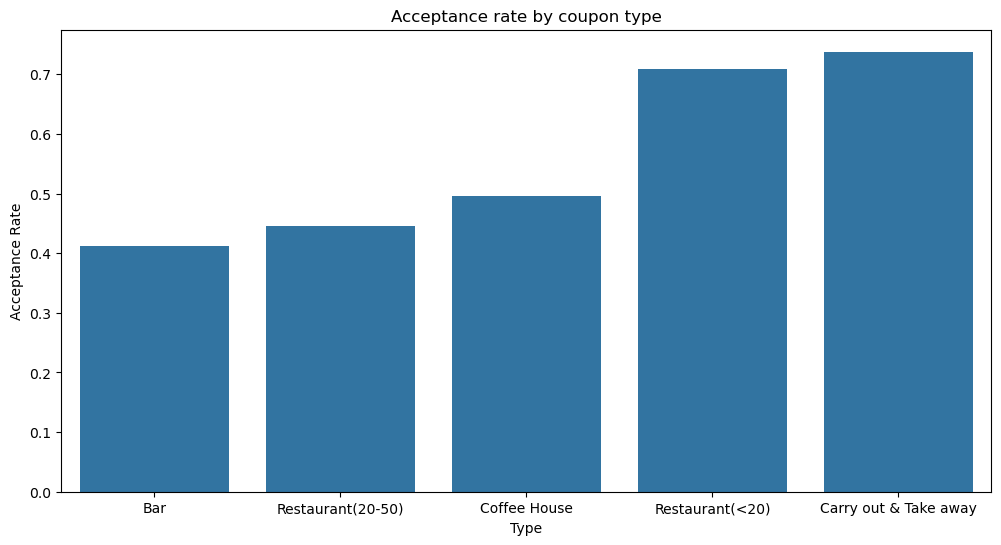

In [30]:
# plot acceptance rates for easy understanding

plt.figure(figsize=(12, 6))
sns.barplot(data=acceptance_rate_by_coupon_type, x='coupon', y='Y')

plt.title('Acceptance rate by coupon type')
plt.xlabel('Type')
plt.ylabel('Acceptance Rate')

# Display the plot
plt.show()


In [31]:
data['coupon'].value_counts(normalize = True)

Coffee House             0.315920
Restaurant(<20)          0.219637
Carry out & Take away    0.188757
Bar                      0.158374
Restaurant(20-50)        0.117311
Name: coupon, dtype: float64

### Problem Statement

Coffee house has a middle-of-the-pack acceptance rate of about 49.6%. Yet it represents almost 32% of the coupons sent.

From a business perspective, this is a major waste of resources.

We need to understand what kind of customer accepts these Coffee House coupons, and therefore the remainder of this analysis will be to determine the characteristics of drivers who accept the Coffee House coupons, allowing us to better target drivers.


### Data prep

No major data prep is needed beyond what was computed in phase 1.

In [32]:
coupons = data.query("coupon == 'Coffee House'")
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [33]:
accepted_coupons = coupons.query("Y == 1")
accepted_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
54,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1
56,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,1


### Analysis

I will perform further exploratory data analysis to understand the relationship between our selected attributes and acceptance rate of Coffee House coupons. I will first take a broader approach, and then dive into the more interesting findings.

In [34]:
categorical_data = coupons.select_dtypes(include=['object'])
categorical_data.describe()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816,3816
unique,3,4,3,5,1,2,2,8,5,6,25,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,2h,Female,21,Single,Some college - no degree,Unemployed,never,less1,1~3,1~3,less1
freq,2053,2157,3316,1043,3816,2123,1969,844,1497,1328,551,1556,1052,1453,1633,1798


In [35]:
categorical_columns = coupons.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [36]:
# focusing on just the interesting ones at this time
cat_refined = ['destination',
 'passanger',
 'weather',
 'time',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'CoffeeHouse']

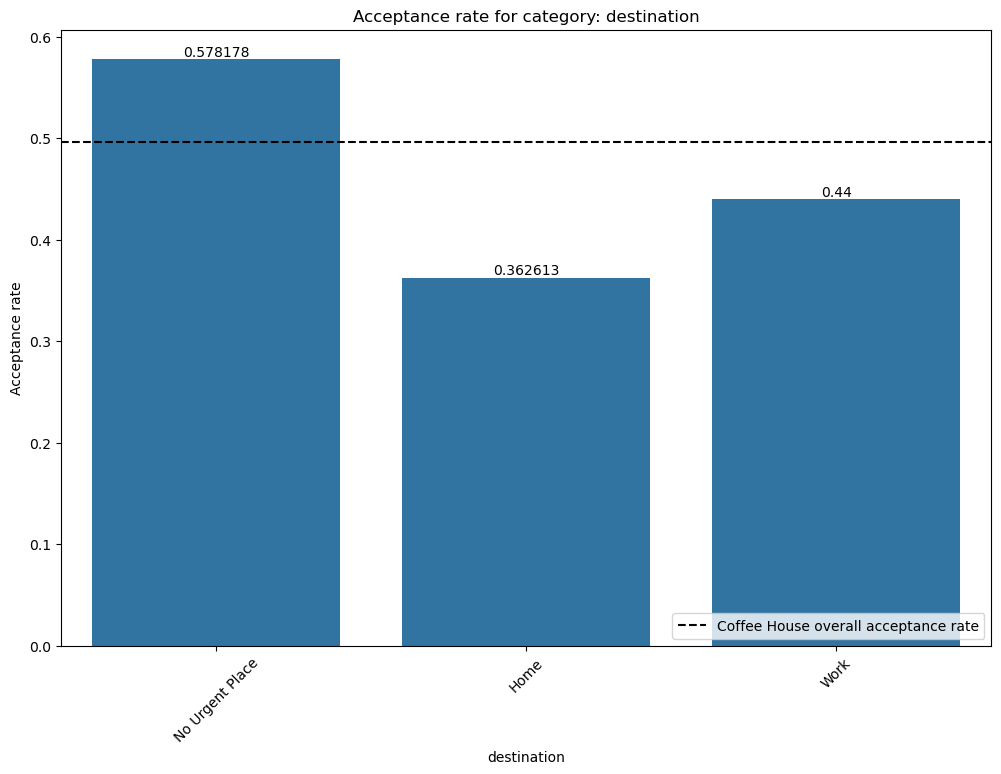

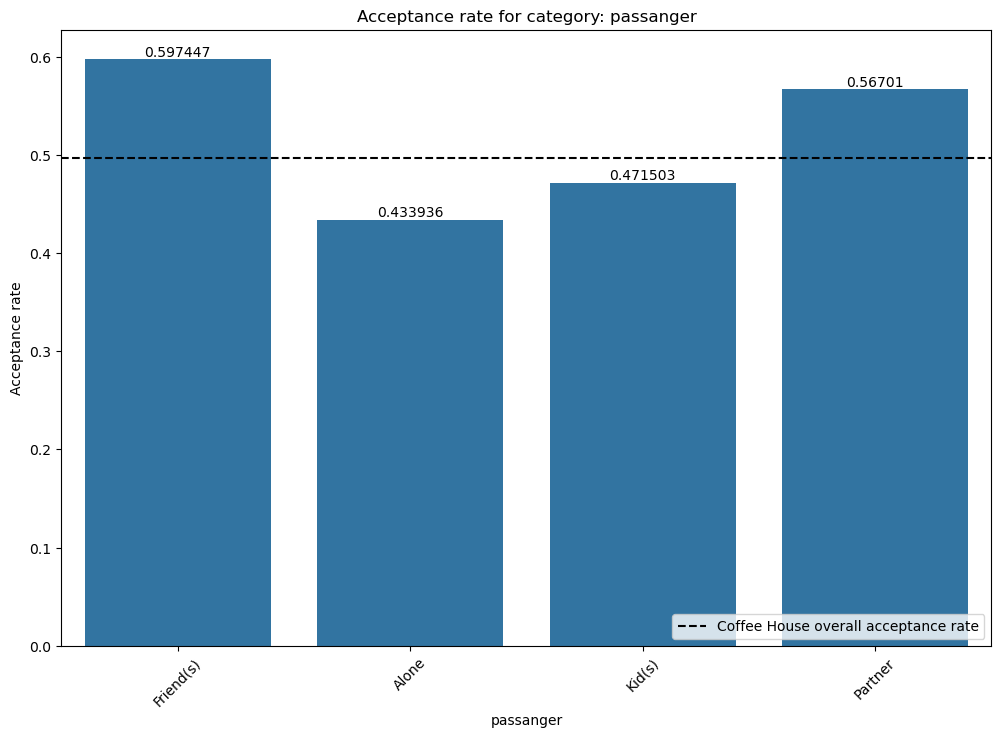

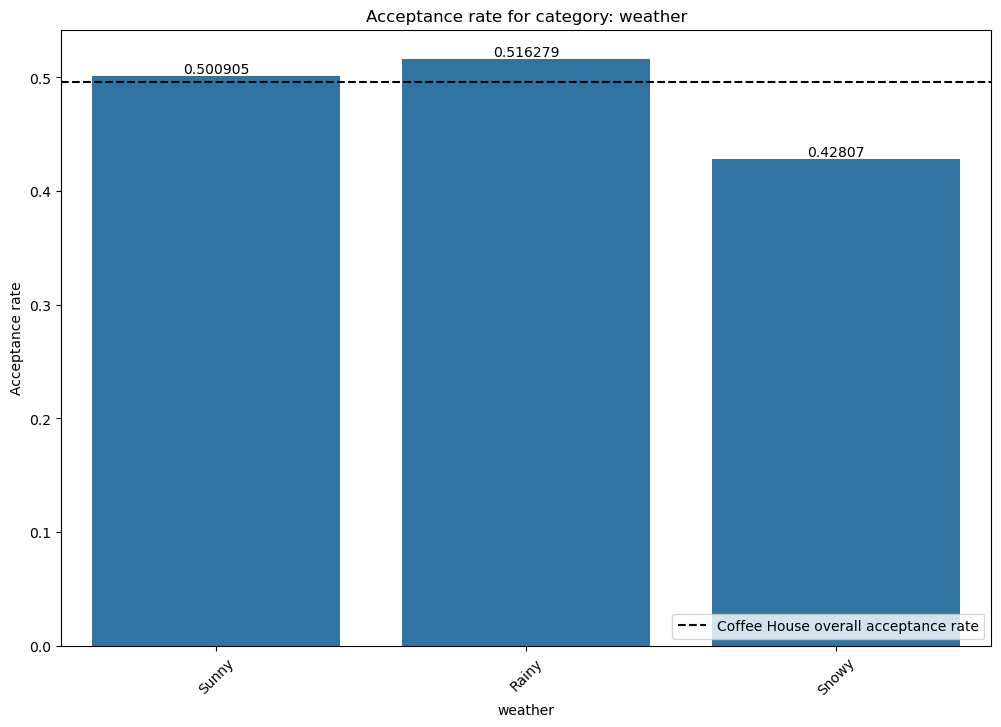

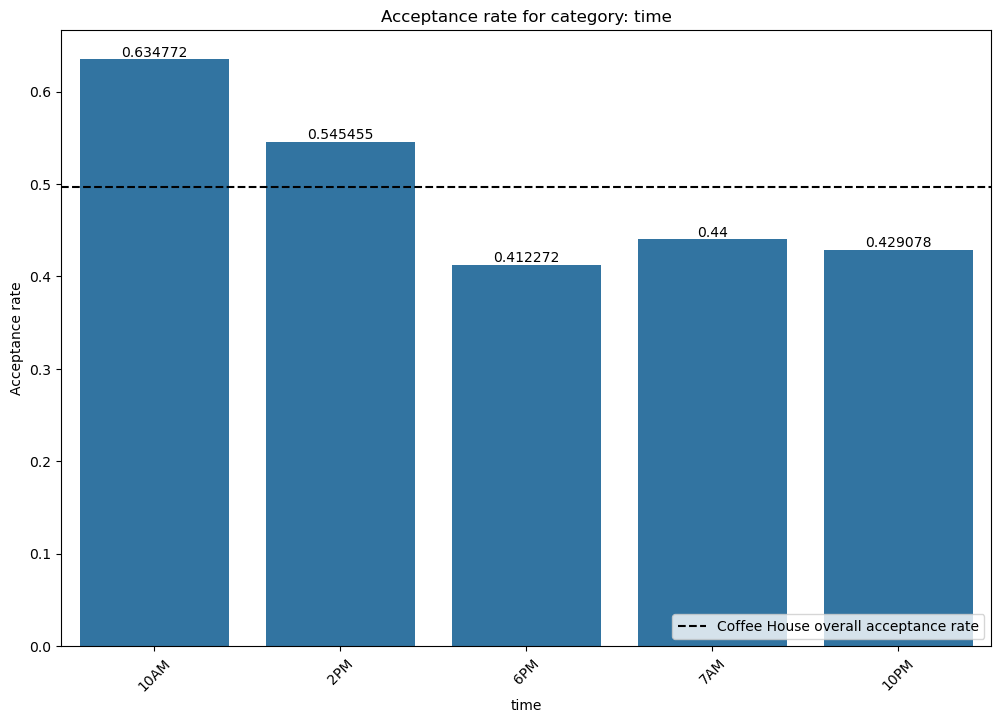

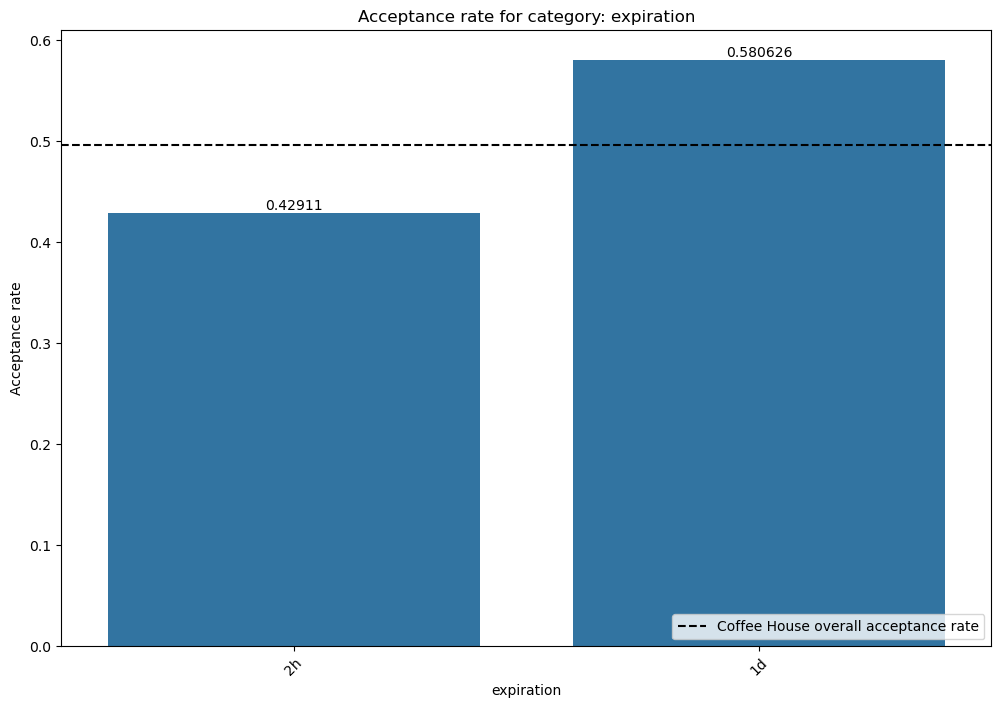

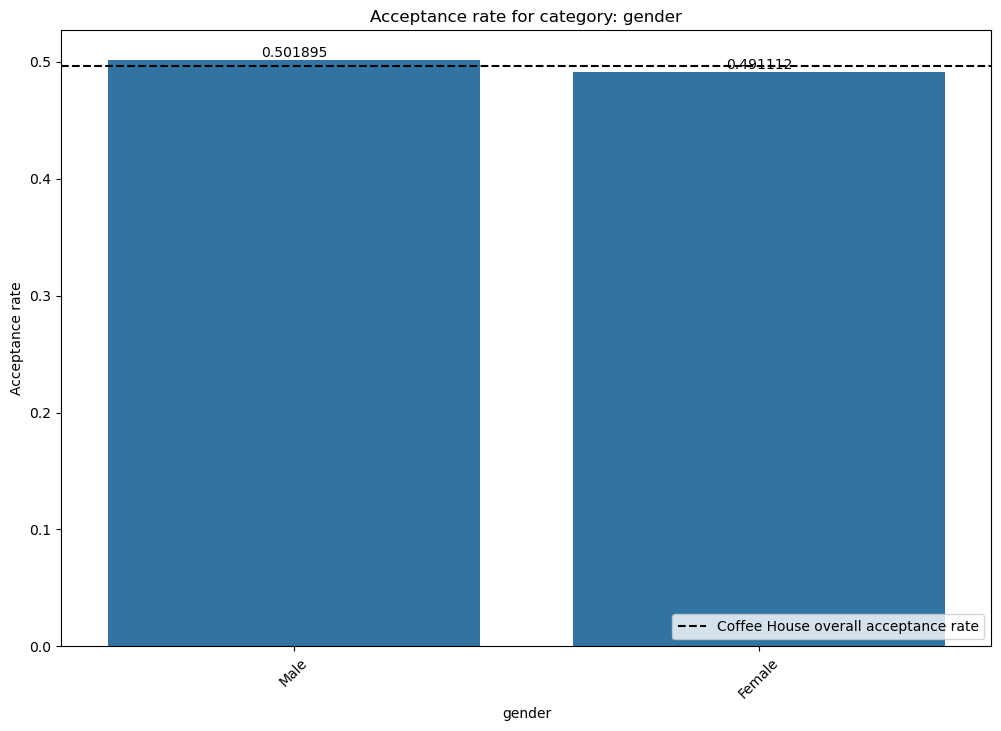

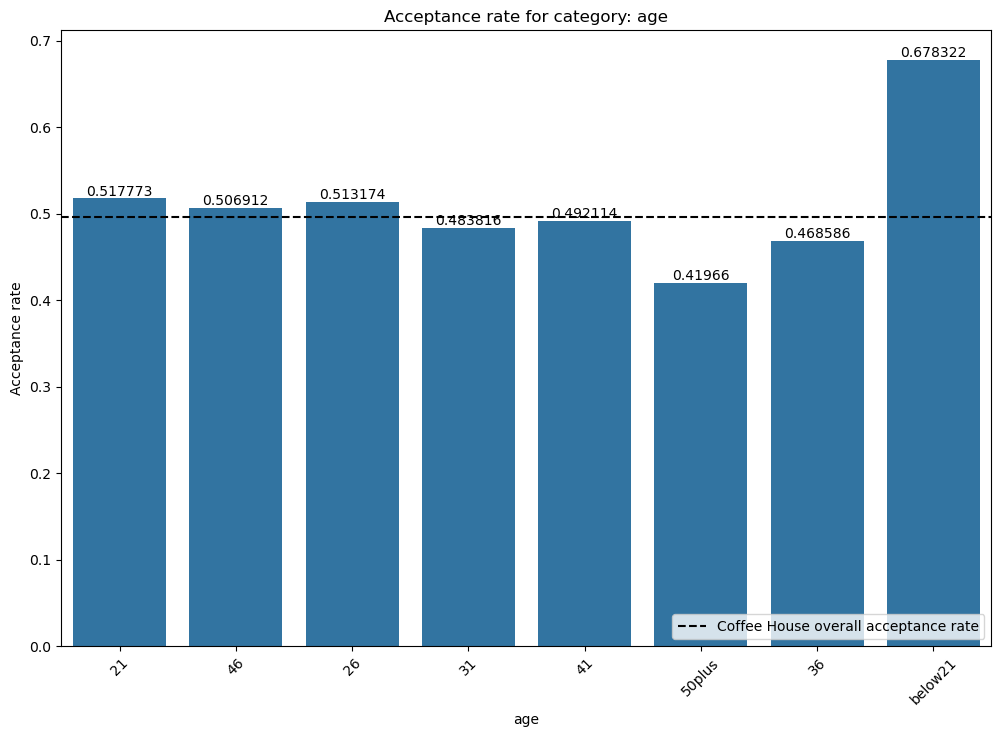

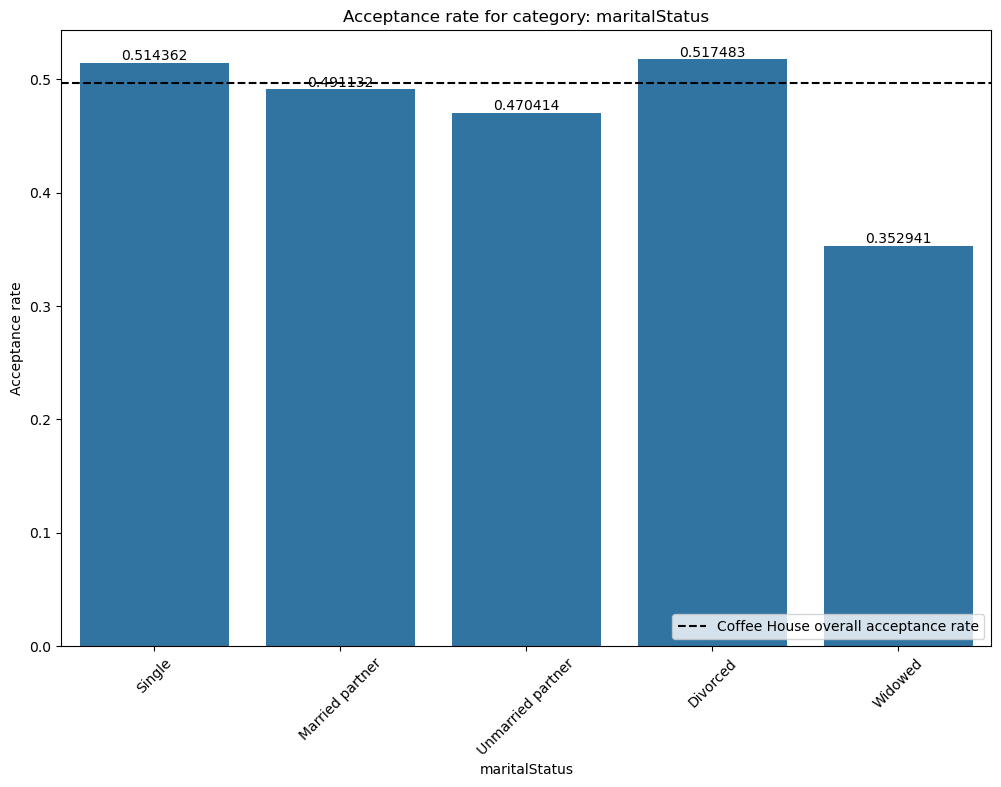

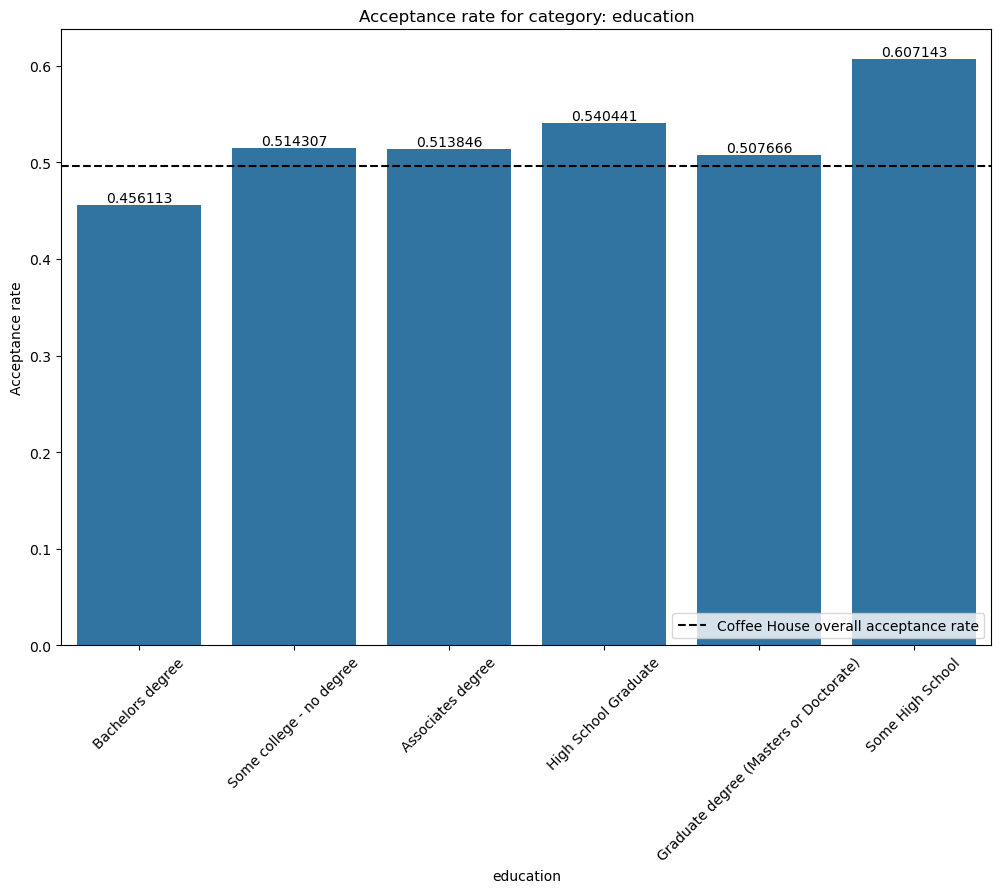

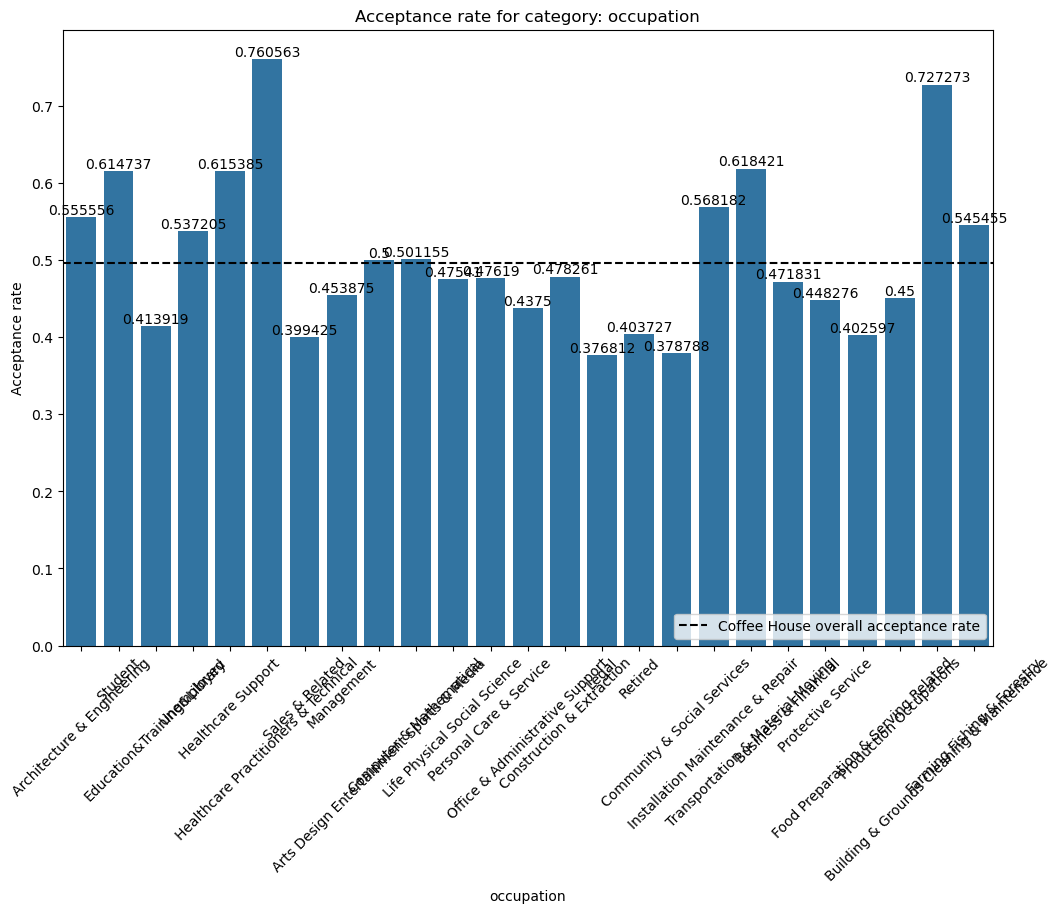

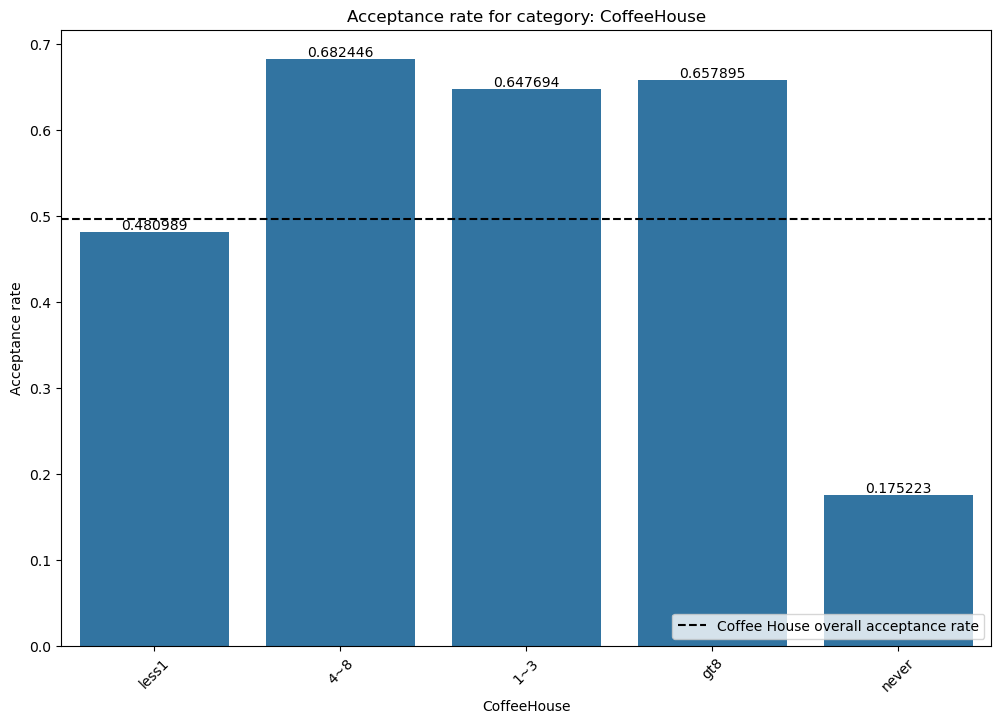

In [37]:
# bar plot the average acceptance rate for these interesting categories
# do a fancy loop
for category in cat_refined:
    plt.figure(figsize=(12,8))
    cat_bar_plot = sns.barplot(x=category, y="Y", data=coupons, estimator=np.mean, errorbar=None)
    cat_bar_plot.bar_label(cat_bar_plot.containers[0])
    plt.title(f'Acceptance rate for category: {category}')
    cat_bar_plot.set_ylabel('Acceptance rate')
    cat_bar_plot.set_xlabel(f'{category}')
    plt.xticks(rotation=45)
    # we also want to plot the average acceptance rate so we can give context to what's good or bad
    cat_bar_plot.axhline(y=ch_acc_rate, color='black', \
                         linestyle='--', label='Coffee House overall acceptance rate')
    plt.legend(loc='lower right')
    plt.show()

### Initial Findings

A few categories seem to have a major differences in Coffee House coupon acceptance rates based on their values:
 - destination: higher when there's no urgency
 - passanger: higher when there is a "social" passanger--friend or partner
 - weather: lower when snowy
 - time: higher in the early hours
 - expiration: higher when it doesn't expire right away
 - age: higher for below 21
 - education: highest for some high school, lowest for bachelor's
 - occupation: lots of variation--difficult to interpret based on this plot alone
 - CoffeeHouse: higher if the driver visits coffee houses more frequently per month
 
 While these are all interesting, the ones I will follow-up on now are occupation, and age.

### Deep Dive Analysis

#### Occupation

This is the most interesting category, given the variance. Let's calculate and sort it by acceptance rate to see what insights we might glean.

In [38]:
occupation = pd.DataFrame(data.groupby('occupation')['Y'].mean()).reset_index()
occupation.sort_values(by='Y', inplace=True, ascending = False)
occupation

,occupation,Y
10,Healthcare Practitioners & Technical,0.716216
18,Production Occupations,0.704545
11,Healthcare Support,0.698347
6,Construction & Extraction,0.688312
19,Protective Service,0.645714
0,Architecture & Engineering,0.634286
22,Student,0.608550
16,Office & Administrative Support,0.602917
23,Transportation & Material Moving,0.596330
15,Management,0.593264


This is a generalzation, but it is very interesting that the top 5 results are associated with early start times and long hours--health care workers, factory workers, construction workers, and police, essentially. It makes sense that these individuals might be more inclined to accept.

However, they may generally be heavier coffee drinkers, meaning they already go to coffee houses more frequently than others. The below crosstabulation will help us understand.

In [39]:
highest_jobs = occupation.head(5)['occupation'].to_list()

coupons_highest_jobs = coupons.query("occupation in @highest_jobs")

cross = round(pd.crosstab(coupons_highest_jobs['CoffeeHouse'], coupons_highest_jobs['occupation']) * 100, 2)

<Figure size 1200x800 with 0 Axes>

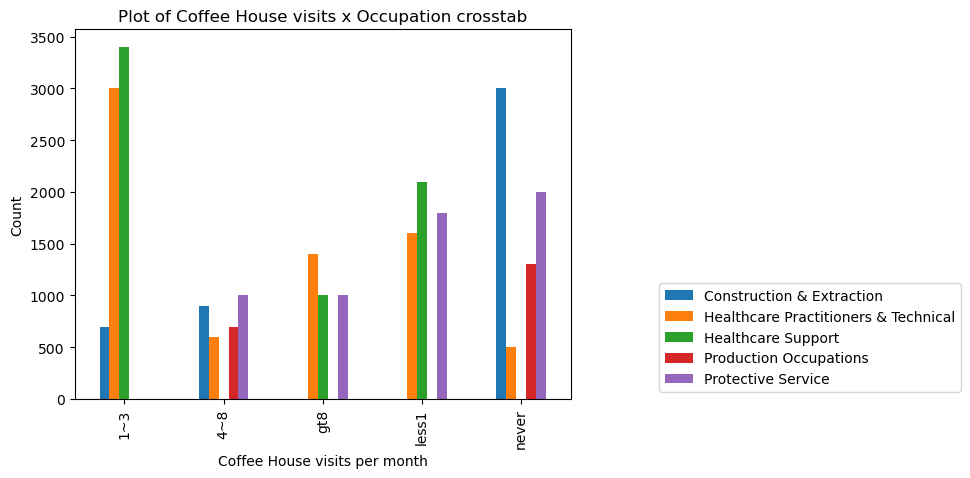

In [40]:
plt.figure(figsize=(12,8))

cross.plot(kind='bar')
plt.xlabel('Coffee House visits per month')
plt.ylabel('Count')
plt.title('Plot of Coffee House visits x Occupation crosstab')
plt.legend(loc='lower right', bbox_to_anchor=(1.8, 0))

plt.show()

Most of these drivers in these occupations are actually distributed in "never" and less than 1. Based on above findings, we would expect that drivers in these groups drink less coffee--however, these professionals are accepting the coupon quite often!
There's no causal relationship shown here, but this is good for a future follow-up.

#### Age
It is not surprising that individuals below 21 years of age might be interested in a trendy, social activity like going to a coffee house. I suspect this is related to a lack of responsibility, so lets see how often these individuals are headed "somewhere urgent".

In [41]:
# make a column to bucket by below21, then everyone else
# using copy to avoid warning
coupons_copy = coupons.copy()
condition = coupons_copy['age'] == 'below21'
coupons_copy.loc[condition, 'young_old'] = 'young'
coupons_copy.loc[~condition, 'young_old'] = 'old'
coupons_copy.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,young_old
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,old
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,old
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,old
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,old
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,old


In [42]:
# group by young/old to get the number headed to each destination
counts_by_young_old = coupons_copy.groupby('young_old')['destination'].value_counts().unstack(fill_value=0)
counts_by_young_old['total'] = counts_by_young_old.sum(axis=1)

# change to percentages to allow for comparison
percentage_counts = counts_by_young_old.div(counts_by_young_old['total'], axis=0)
percentage_counts = percentage_counts.drop('total', axis=1)
percentage_counts

destination,Home,No Urgent Place,Work
young_old,,,
old,0.231146,0.540430,0.228424
young,0.272727,0.475524,0.251748


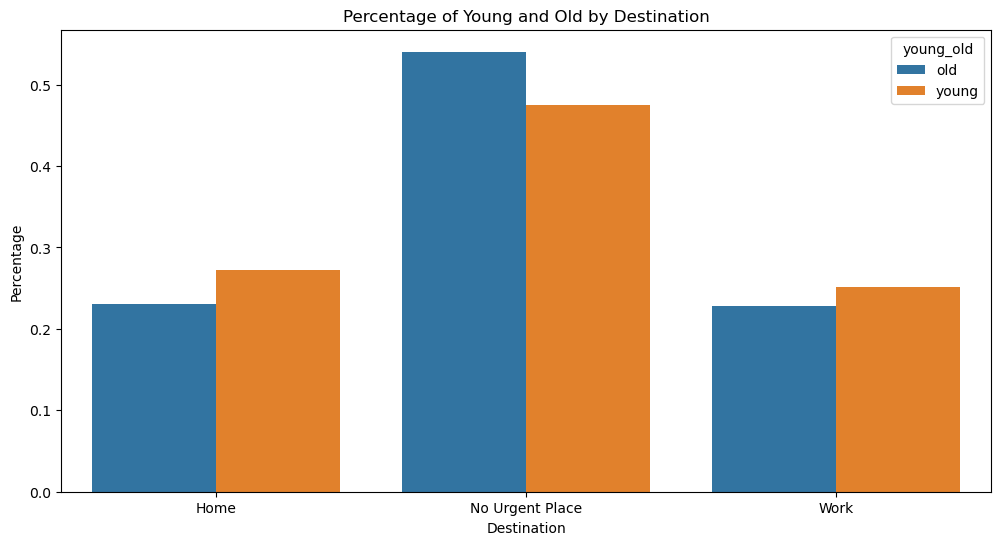

In [43]:
# now plot to compare
percentage_counts_long = percentage_counts.stack().reset_index().rename(columns={0: 'Percentage'})

plt.figure(figsize=(12, 6))
sns.barplot(x='destination', y='Percentage', hue='young_old', data=percentage_counts_long)

plt.xlabel('Destination')
plt.ylabel('Percentage')
plt.title('Percentage of Young and Old by Destination')

plt.show()

This defied my expectations. Old people were more likely to be going no urgent place. I would have expected the opposite.
I suppose this just suggests young people are more likely to enjoy coffee. This probably requires further analysis by different age group.

### Next Steps

My recommendation for increasing Coffee House coupon acceptance rate is to target younger individuals, early in the morning. Ideally, these would be sent when weather is not snowy. 
For higher uptake, the coupons should not expire immediately.

Consider some special deals for healthcare workers, construction workers, and those in uniform.

Technically, I think we have some details that need to be further examined. Why are young people more likely to accept the coupon? Is it only a matter of taste? We want some way to maintain this as the consumers "age up", because the below 21 market is very small and transient.